In [1]:
import pandas as pd
df = pd.read_csv('/Users/saianoopavunuri/Documents/cs_projects/flight_delay_prediction/2018.csv')
top_10_groups = df.groupby(['OP_CARRIER', 'OP_CARRIER_FL_NUM'])['DEP_DELAY'].median()

# Sort the groups by the calculated median in descending order and get the top 50
top_10_groups = top_10_groups.sort_values(ascending=False).head(50)

print(top_10_groups)


OP_CARRIER  OP_CARRIER_FL_NUM
UA          1650                 762.0
F9          7306                 478.0
            2822                 389.0
G4          5111                 355.0
F9          1719                 339.0
G4          2328                 316.0
            2860                 310.0
            2859                 292.0
EV          5324                 279.0
G4          5779                 264.0
EV          5273                 207.0
UA          2770                 206.0
G4          5665                 199.0
AS          282                  198.0
EV          5322                 182.0
G4          2304                 182.0
OO          4106                 181.0
            4218                 181.0
EV          5307                 180.0
            5280                 173.0
            5347                 169.0
G4          2305                 167.0
            5441                 165.0
            5105                 162.0
EV          5267                 1

In [6]:
# Group by 'OP_CARRIER' and 'OP_CARRIER_FL_NUM'
grouped = df.groupby(['OP_CARRIER', 'OP_CARRIER_FL_NUM'])

# Filter groups with a size of at least 10
filtered_groups = grouped.filter(lambda x: len(x) >= 500)

# Calculate the median of 'DEP_DELAY' for the filtered groups
top_10_groups = filtered_groups.groupby(['OP_CARRIER', 'OP_CARRIER_FL_NUM'])['DEP_DELAY'].median()

# Sort the groups by the calculated median in descending order and get the top 50
top_10_groups = top_10_groups.sort_values(ascending=False).head(50)

print(top_10_groups)

OP_CARRIER  OP_CARRIER_FL_NUM
DL          2398                 14.0
F9          1139                 12.0
WN          38                   11.0
B6          566                  11.0
WN          483                   8.0
UA          1551                  7.0
WN          32                    7.0
            42                    7.0
            2263                  6.0
F9          1702                  6.0
WN          44                    6.0
            878                   6.0
            63                    6.0
            160                   6.0
            2016                  6.0
            674                   6.0
            406                   5.5
            696                   5.0
            707                   5.0
            757                   5.0
            287                   5.0
            285                   5.0
            780                   5.0
            1814                  5.0
            847                   5.0
            48      

In [146]:
import pandas as pd
start_year = 2018
end_year = 2018

def get_df(carrier, flight_number, start_year, end_year, exclude=None):
    ans = None
    for year in range(start_year, end_year+1):
        df = pd.read_csv(f"/Users/saianoopavunuri/Documents/cs_projects/flight_delay_prediction/{year}.csv")
        if ans is None:
            ans = df[(df['OP_CARRIER'] == carrier) & (df['OP_CARRIER_FL_NUM'] == flight_number)]
            continue
        ans = pd.concat([ans, df[(df['OP_CARRIER'] == carrier) & (df['OP_CARRIER_FL_NUM'] == flight_number)]])
    
    return ans


SELECTED_OP_CARRIER = 'DL'
SELECTED_FL_NUM = 2398

# Combine multiple years for a single flight path
df = get_df(SELECTED_OP_CARRIER, SELECTED_FL_NUM, start_year, end_year)

# Combine multiple flights for a year
# df = pd.read_csv('/Users/saianoopavunuri/Documents/cs_projects/flight_delay_prediction/2018.csv')

# # Group by ORIGIN, DEST, and OP_CARRIER and count occurrences, then sort
# top_50_groups = df.groupby(['ORIGIN', 'DEST', 'OP_CARRIER']).size().sort_values(ascending=False).head(10)

# # Convert MultiIndex to a list of lists
# routes = [list(idx) for idx in top_50_groups.index]

# temp = pd.DataFrame()
# for route in routes:
#     origin, dest, carrier = route[0], route[1], route[2]
#     temp = pd.concat([temp, df[(df['OP_CARRIER'] == carrier) & (df['ORIGIN'] == origin) & (df['DEST'] == dest)]])
# df = temp

In [150]:
filtered_df = df[(df['OP_CARRIER'] == SELECTED_OP_CARRIER) & (df['OP_CARRIER_FL_NUM'] == SELECTED_FL_NUM)]
filtered_df = filtered_df.reset_index()

filtered_df['DEP_DELAY'] = filtered_df['DEP_DELAY'].apply(lambda x: max(0,x))
#filtered_df['DEP_DELAY'] = filtered_df['DEP_DELAY'].apply(lambda x: min(90,x))


# Convert the time column to a string and format it
filtered_df['CRS_DEP_TIME'] = filtered_df['CRS_DEP_TIME'].apply(lambda x: '{:04.0f}'.format(x))
filtered_df['CRS_DEP_TIME'] = filtered_df['CRS_DEP_TIME'].str[:2] + ':' + filtered_df['CRS_DEP_TIME'].str[2:]

# Combine date and time columns
filtered_df['datetime'] = pd.to_datetime(filtered_df['FL_DATE'] + ' ' + filtered_df['CRS_DEP_TIME'])
DROPPED_COLUMNS = ['CANCELLATION_CODE', 'CARRIER_DELAY', 'WEATHER_DELAY', 'SECURITY_DELAY', 'LATE_AIRCRAFT_DELAY', 'Unnamed: 27', 'NAS_DELAY', 'CANCELLED', 'DIVERTED']
filtered_df = filtered_df.drop(columns=DROPPED_COLUMNS)
filtered_df.dropna(inplace=True)

data = filtered_df.copy()
# Convert the time column to a string and format it
data['CRS_DEP_TIME'] = data['CRS_DEP_TIME'].apply(lambda x: x.replace(":","")).astype(int).apply(lambda x: '{:04.0f}'.format(x))
data['CRS_DEP_TIME'] = data['CRS_DEP_TIME'].str[:2] + ':' + data['CRS_DEP_TIME'].str[2:]

# Combine date and time columns
data['datetime'] = pd.to_datetime(data['FL_DATE'] + ' ' + data['CRS_DEP_TIME'])
data = data.sort_values(by='datetime')
data.reset_index(inplace=True)

# Convert datetime to its components
data['year'] = data['datetime'].dt.year
data['month'] = data['datetime'].dt.month
data['day'] = data['datetime'].dt.day
data['hour'] = data['datetime'].dt.hour
data['dayofweek'] = data['datetime'].dt.dayofweek  # Monday=0, Sunday=6

# One-hot encode the time variables
data = pd.get_dummies(data, columns=['month', 'day', 'hour', 'dayofweek'])


In [148]:
data

,level_0,index,FL_DATE,OP_CARRIER,OP_CARRIER_FL_NUM,ORIGIN,DEST,CRS_DEP_TIME,DEP_TIME,DEP_DELAY,...,hour_16,hour_17,hour_18,dayofweek_0,dayofweek_1,dayofweek_2,dayofweek_3,dayofweek_4,dayofweek_5,dayofweek_6
0,0,25679,2017-01-02,DL,2398,BZN,MSP,05:45,606.0,21.0,...,0,0,0,1,0,0,0,0,0,0
1,1,32517,2017-01-03,DL,2398,BZN,MSP,05:45,549.0,4.0,...,0,0,0,0,1,0,0,0,0,0
2,2,54605,2017-01-04,DL,2398,BZN,MSP,05:45,552.0,7.0,...,0,0,0,0,0,1,0,0,0,0
3,3,71004,2017-01-05,DL,2398,BZN,MSP,05:45,550.0,5.0,...,0,0,0,0,0,0,1,0,0,0
4,4,81157,2017-01-06,DL,2398,BZN,MSP,05:45,548.0,3.0,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1142,1167,7145874,2018-12-28,DL,2398,EWR,ATL,17:59,1827.0,28.0,...,0,1,0,0,0,0,0,1,0,0
1143,1168,7160694,2018-12-29,DL,2398,ATL,EWR,15:02,1500.0,0.0,...,0,0,0,0,0,0,0,0,1,0
1144,1169,7160695,2018-12-29,DL,2398,EWR,ATL,17:59,1754.0,0.0,...,0,1,0,0,0,0,0,0,1,0
1145,1170,7187114,2018-12-30,DL,2398,ATL,EWR,15:02,1546.0,44.0,...,0,0,0,0,0,0,0,0,0,1


In [164]:
import requests
lat = 38.95
long = -77.46
response = requests.get(f'https://archive-api.open-meteo.com/v1/archive?latitude={lat}&longitude={long}&start_date={start_year}-01-01&end_date={end_year}-12-31&hourly=temperature_2m,rain,snowfall,cloudcover,windspeed_100m')
weather = response.json()

weather_dict = {}
from datetime import datetime
for i, date in enumerate(weather['hourly']['time']):
    hour  = datetime.strptime(date, "%Y-%m-%dT%H:%M")
    weather_dict[hour] = {'temperature_2m': weather['hourly']['temperature_2m'][i],'rain': weather['hourly']['rain'][i], 'snowfall': weather['hourly']['snowfall'][i], 'cloudcover': weather['hourly']['cloudcover'][i], 'windspeed_100m': weather['hourly']['windspeed_100m'][i] }

# Floor the datetime to the nearest hour
data["floored_datetime"] = data["datetime"].dt.floor("H")

# Look up the weather data and add new columns to the DataFrame
for feature in ['temperature_2m', 'rain', 'snowfall', 'cloudcover', 'windspeed_100m']:
    data[feature] = data["floored_datetime"].map(lambda x: weather_dict.get(x, {}).get(feature, None))

# Drop the 'floored_datetime' column if not needed
data.drop(columns=["floored_datetime"], inplace=True)
data = data.sort_values(by='datetime')


/var/folders/2t/mfs621pj7r38pl663d60tjmw0000gn/T/ipykernel_15921/994952462.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["floored_datetime"] = data["datetime"].dt.floor("H")
/var/folders/2t/mfs621pj7r38pl663d60tjmw0000gn/T/ipykernel_15921/994952462.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[feature] = data["floored_datetime"].map(lambda x: weather_dict.get(x, {}).get(feature, None))
/var/folders/2t/mfs621pj7r38pl663d60tjmw0000gn/T/ipykernel_15921/994952462.py:18: SettingWithCopyWa

In [163]:
data['DEP_DELAY'].describe()

count    1052.000000
mean       45.260456
std        71.021583
min         0.000000
25%         0.000000
50%        21.000000
75%        57.000000
max       904.000000
Name: DEP_DELAY, dtype: float64

In [165]:
data['DEST'].value_counts()

EWR    526
ATL    526
Name: DEST, dtype: int64

In [166]:
data

,level_0,index,FL_DATE,OP_CARRIER,OP_CARRIER_FL_NUM,ORIGIN,DEST,CRS_DEP_TIME,DEP_TIME,DEP_DELAY,...,dayofweek_3,dayofweek_4,dayofweek_5,dayofweek_6,DEP_CAT,temperature_2m,rain,snowfall,cloudcover,windspeed_100m
45,45,692296,2017-02-17,DL,2398,ATL,EWR,15:15,1618.0,63.0,...,0,1,0,0,60+,2.5,0.0,0.0,20,4.8
46,46,692297,2017-02-17,DL,2398,EWR,ATL,18:15,2157.0,222.0,...,0,1,0,0,60+,7.9,0.0,0.0,2,4.7
48,48,729908,2017-02-20,DL,2398,ATL,EWR,15:15,1512.0,0.0,...,0,0,0,0,0-15,13.7,0.0,0.0,0,21.4
49,49,729909,2017-02-20,DL,2398,EWR,ATL,18:15,1810.0,0.0,...,0,0,0,0,0-15,16.4,0.0,0.0,0,19.0
50,50,749500,2017-02-21,DL,2398,ATL,EWR,15:15,1513.0,0.0,...,0,0,0,0,0-15,8.0,0.0,0.0,30,16.9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1142,1167,7145874,2018-12-28,DL,2398,EWR,ATL,17:59,1827.0,28.0,...,0,1,0,0,15-30,11.8,3.0,0.0,100,25.0
1143,1168,7160694,2018-12-29,DL,2398,ATL,EWR,15:02,1500.0,0.0,...,0,0,1,0,0-15,10.7,0.0,0.0,22,27.1
1144,1169,7160695,2018-12-29,DL,2398,EWR,ATL,17:59,1754.0,0.0,...,0,0,1,0,0-15,10.1,0.0,0.0,22,31.3
1145,1170,7187114,2018-12-30,DL,2398,ATL,EWR,15:02,1546.0,44.0,...,0,0,0,1,30-60,4.2,0.0,0.0,63,7.7


In [243]:
# Function to remove outliers based on IQR
def remove_outliers_iqr(df, column_name, lower_percentile=0.25, upper_percentile=0.75, threshold=1.5):
    q1 = df[column_name].quantile(lower_percentile)
    q3 = df[column_name].quantile(upper_percentile)
    iqr = q3 - q1
    lower_bound = q1 - threshold * iqr
    upper_bound = q3 + threshold * iqr
    df_filtered = df[(df[column_name] >= lower_bound) & (df[column_name] <= upper_bound)].copy()
    return df_filtered


# Specify the column name for which you want to remove outliers
column_name = 'DEP_DELAY'

# Remove outliers and get the cleaned DataFrame
data = remove_outliers_iqr(data, column_name)

print(data.shape)

(5859, 21)


In [655]:
data = data[(data['ORIGIN'] == 'IAD') & (data['DEST'] == 'DEN')]

In [154]:
# Only look at days that had 3 flights

mask = data.groupby('FL_DATE')['FL_DATE'].transform('size') > 1
data = data[mask]


In [155]:
data['DEP_DELAY'].describe()

count    1052.000000
mean       45.260456
std        71.021583
min         0.000000
25%         0.000000
50%        21.000000
75%        57.000000
max       904.000000
Name: DEP_DELAY, dtype: float64

In [21]:
data

,level_0,index,FL_DATE,OP_CARRIER,OP_CARRIER_FL_NUM,ORIGIN,DEST,CRS_DEP_TIME,DEP_TIME,DEP_DELAY,...,hour_16,hour_17,hour_18,dayofweek_0,dayofweek_1,dayofweek_2,dayofweek_3,dayofweek_4,dayofweek_5,dayofweek_6
1,1,35224,2018-01-02,DL,2398,ATL,EWR,14:52,1456.0,4.0,...,0,0,0,0,1,0,0,0,0,0
2,2,35225,2018-01-02,DL,2398,EWR,ATL,17:42,1755.0,13.0,...,0,1,0,0,1,0,0,0,0,0
3,3,56607,2018-01-03,DL,2398,ATL,EWR,15:34,1539.0,5.0,...,0,0,0,0,0,1,0,0,0,0
4,4,56608,2018-01-03,DL,2398,EWR,ATL,18:45,1851.0,6.0,...,0,0,1,0,0,1,0,0,0,0
5,7,95122,2018-01-05,DL,2398,ATL,EWR,15:34,1545.0,11.0,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
574,583,7145874,2018-12-28,DL,2398,EWR,ATL,17:59,1827.0,28.0,...,0,1,0,0,0,0,0,1,0,0
575,584,7160694,2018-12-29,DL,2398,ATL,EWR,15:02,1500.0,0.0,...,0,0,0,0,0,0,0,0,1,0
576,585,7160695,2018-12-29,DL,2398,EWR,ATL,17:59,1754.0,0.0,...,0,1,0,0,0,0,0,0,1,0
577,586,7187114,2018-12-30,DL,2398,ATL,EWR,15:02,1546.0,44.0,...,0,0,0,0,0,0,0,0,0,1


In [95]:
data['DEP_CAT'] = data['DEP_DELAY'].apply(lambda x: '0-30' if x <= 30 else ('30-60' if x <= 60 else '60+'))

/var/folders/2t/mfs621pj7r38pl663d60tjmw0000gn/T/ipykernel_15921/2317443605.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['DEP_CAT'] = data['DEP_DELAY'].apply(lambda x: '0-30' if x <= 30 else ('30-60' if x <= 60 else '60+'))


In [96]:
data

,level_0,index,FL_DATE,OP_CARRIER,OP_CARRIER_FL_NUM,ORIGIN,DEST,CRS_DEP_TIME,DEP_TIME,DEP_DELAY,...,hour_17,hour_18,dayofweek_0,dayofweek_1,dayofweek_2,dayofweek_3,dayofweek_4,dayofweek_5,dayofweek_6,DEP_CAT
1,1,35224,2018-01-02,DL,2398,ATL,EWR,14:52,1456.0,4.0,...,0,0,0,1,0,0,0,0,0,0-30
2,2,35225,2018-01-02,DL,2398,EWR,ATL,17:42,1755.0,13.0,...,1,0,0,1,0,0,0,0,0,0-30
3,3,56607,2018-01-03,DL,2398,ATL,EWR,15:34,1539.0,5.0,...,0,0,0,0,1,0,0,0,0,0-30
4,4,56608,2018-01-03,DL,2398,EWR,ATL,18:45,1851.0,6.0,...,0,1,0,0,1,0,0,0,0,0-30
5,7,95122,2018-01-05,DL,2398,ATL,EWR,15:34,1545.0,11.0,...,0,0,0,0,0,0,1,0,0,0-30
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
574,583,7145874,2018-12-28,DL,2398,EWR,ATL,17:59,1827.0,28.0,...,1,0,0,0,0,0,1,0,0,0-30
575,584,7160694,2018-12-29,DL,2398,ATL,EWR,15:02,1500.0,0.0,...,0,0,0,0,0,0,0,1,0,0-30
576,585,7160695,2018-12-29,DL,2398,EWR,ATL,17:59,1754.0,0.0,...,1,0,0,0,0,0,0,1,0,0-30
577,586,7187114,2018-12-30,DL,2398,ATL,EWR,15:02,1546.0,44.0,...,0,0,0,0,0,0,0,0,1,30-60


In [156]:
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import LabelEncoder

# Assuming 'data' has a 'DEP_CAT' column
data['DEP_CAT'] = data['DEP_DELAY'].apply(lambda x: '0-15' if x <= 30 else ('30-60' if x <= 60 else '60+'))

# Encoding the labels
encoder = LabelEncoder()
encoded_Y = encoder.fit_transform(data['DEP_CAT'])
dummy_y = to_categorical(encoded_Y)


/var/folders/2t/mfs621pj7r38pl663d60tjmw0000gn/T/ipykernel_15921/2759450707.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['DEP_CAT'] = data['DEP_DELAY'].apply(lambda x: '0-15' if x <= 15 else ( '15-30' if  x <= 30 else ('30-60' if x <= 60 else '60+')))


In [157]:
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import LabelEncoder

# Assuming 'data' has a 'DEP_CAT' column
data['DEP_CAT'] = data['DEP_DELAY'].apply(lambda x: '0-15' if x <= 15 else ( '15-30' if  x <= 30 else ('30-60' if x <= 60 else '60+')))

# Encoding the labels
encoder = LabelEncoder()
encoded_Y = encoder.fit_transform(data['DEP_CAT'])
dummy_y = to_categorical(encoded_Y)

/var/folders/2t/mfs621pj7r38pl663d60tjmw0000gn/T/ipykernel_15921/1059635510.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['DEP_CAT'] = data['DEP_DELAY'].apply(lambda x: '0-15' if x <= 15 else ( '15-30' if  x <= 30 else ('30-60' if x <= 60 else '60+')))


In [158]:
def create_sequences(features, target, window_size):
    X, y = [], []
    for i in range(0,len(features) - window_size, window_size+1):
        X.append(features[i:i+window_size])
        y.append(target[i+window_size])
    return np.array(X), np.array(y)

window_size = 1
X, y = create_sequences(features.values, dummy_y, window_size)


In [159]:
# Number of categories
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

num_categories = dummy_y.shape[1]

model = Sequential()
model.add(LSTM(64, input_shape=(X_train.shape[1], X_train.shape[2]), return_sequences=True))
model.add(Dropout(0.3))
model.add(LSTM(80, return_sequences=True))
model.add(Dropout(0.3))
model.add(LSTM(50, return_sequences=False))
model.add(Dropout(0.3))
model.add(Dense(50, activation='relu'))
model.add(Dense(num_categories, activation='softmax'))  # Change for classification
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])  # Change loss and metric

# Train model
model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test), shuffle=False)

# Predict
y_pred = model.predict(X_test)

Epoch 1/50
7/7 [==============================] - 3s 88ms/step - loss: 1.3822 - accuracy: 0.3194 - val_loss: 1.3788 - val_accuracy: 0.4259
Epoch 2/50
7/7 [==============================] - 0s 6ms/step - loss: 1.3704 - accuracy: 0.4213 - val_loss: 1.3693 - val_accuracy: 0.4259
Epoch 3/50
7/7 [==============================] - 0s 5ms/step - loss: 1.3566 - accuracy: 0.4167 - val_loss: 1.3587 - val_accuracy: 0.4259
Epoch 4/50
7/7 [==============================] - 0s 5ms/step - loss: 1.3377 - accuracy: 0.4167 - val_loss: 1.3461 - val_accuracy: 0.4259
Epoch 5/50
7/7 [==============================] - 0s 5ms/step - loss: 1.3155 - accuracy: 0.4167 - val_loss: 1.3329 - val_accuracy: 0.4259
Epoch 6/50
7/7 [==============================] - 0s 5ms/step - loss: 1.3006 - accuracy: 0.4167 - val_loss: 1.3255 - val_accuracy: 0.4259
Epoch 7/50
7/7 [==============================] - 0s 5ms/step - loss: 1.2940 - accuracy: 0.4167 - val_loss: 1.3262 - val_accuracy: 0.4259
Epoch 8/50
7/7 [=================

SyntaxError: invalid syntax. Perhaps you forgot a comma? (3864407628.py, line 2)

In [161]:
import numpy as np
import pandas as pd
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout, Conv1D
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split


def create_sequences(data, window_size):
    X, y = [], []
    for i in range(0,len(data) - window_size, window_size+1):
        X.append(data[i:i+window_size])
        y.append(data[i+window_size, -1])
    return np.array(X), np.array(y)

# Using past 5 hours to predict the next hour's delay
window_size = 1


# features = data[['rain', 'windspeed_100m'] + [col for col in data.columns if 'month_' in col or 'day_' in col or 'hour_' in col or 'dayofweek_' in col]+ ['ARR_DELAY','DEP_DELAY']]
features = data[[col for col in data.columns if 'month_' in col or 'day_' in col or 'hour_' in col or 'dayofweek_' in col] + ['rain','windspeed_100m'] ['DEP_DELAY']]

X, y = create_sequences(features.values, window_size)
#y = data['DEP_DELAY'].values[window_size:]

# Reshape X for LSTM [samples, timesteps, features]
X = X.reshape(X.shape[0], X.shape[1], features.shape[1])

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Build LSTM model with Stacked layers
model = Sequential()
model.add(LSTM(64, input_shape=(X_train.shape[1], X_train.shape[2]), return_sequences=True)) # Add return_sequences=True for stacking
model.add(Dropout(0.3))
# Second LSTM layer
model.add(LSTM(80, return_sequences=True))
model.add(Dropout(0.3))

model.add(LSTM(80, return_sequences=True))
model.add(Dropout(0.3))

# Third LSTM layer
model.add(LSTM(50, return_sequences=False))
model.add(Dropout(0.3))

model.add(Dense(50, activation='relu'))
model.add(Dense(50, activation='relu'))

model.add(Dense(50, activation='relu'))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')


# Train model
model.fit(X_train, y_train, epochs=20, batch_size=32, validation_data=(X_test, y_test), shuffle=False)

# Predict
y_pred = model.predict(X_test)


Epoch 1/20
14/14 [==============================] - 5s 51ms/step - loss: 8892.9531 - val_loss: 6304.7842
Epoch 2/20
14/14 [==============================] - 0s 5ms/step - loss: 8852.4844 - val_loss: 6199.2661
Epoch 3/20
14/14 [==============================] - 0s 5ms/step - loss: 8508.5361 - val_loss: 5182.0566
Epoch 4/20
14/14 [==============================] - 0s 5ms/step - loss: 6583.2397 - val_loss: 3279.3130
Epoch 5/20
14/14 [==============================] - 0s 5ms/step - loss: 5179.1348 - val_loss: 3425.3215
Epoch 6/20
14/14 [==============================] - 0s 5ms/step - loss: 4949.0537 - val_loss: 2797.3845
Epoch 7/20
14/14 [==============================] - 0s 5ms/step - loss: 4257.4023 - val_loss: 1928.3706
Epoch 8/20
14/14 [==============================] - 0s 4ms/step - loss: 3200.5178 - val_loss: 1342.1838
Epoch 9/20
14/14 [==============================] - 0s 4ms/step - loss: 2877.1279 - val_loss: 1183.5388
Epoch 10/20
14/14 [==============================] - 0s 4ms/ste

In [131]:
from sklearn.metrics import mean_squared_error
from math import sqrt


# Compute RMSE
rmse = sqrt(mean_squared_error(y_pred, y_test))
print(f"Root Mean Square Error (RMSE): {rmse}")

Root Mean Square Error (RMSE): 38.19451461935751


In [601]:
import numpy as np
import pandas as pd
from keras.models import Sequential
from keras.layers import Dense
from sklearn.model_selection import train_test_split

def create_sequences(features, target, window_size):
    X, y = [], []
    for i in range(0, len(features) - window_size, 2):
        X.append(features[i:i+window_size])
        y.append(target[i + window_size])
    return np.array(X), np.array(y)

# Assuming 'data' is your DataFrame and it is already preprocessed
# Define window size
window_size = 1

# Select features and target
feature_columns = [col for col in data.columns if 'month_' in col or 'day_' in col or 'hour_' in col or 'dayofweek_' in col] + ['DEP_DELAY']
features = data[feature_columns]
target = data['DEP_DELAY']

# Create sequences
X, y = create_sequences(features.values, target.values, window_size)

# Reshape X for Dense model [samples, features]
X = X.reshape(X.shape[0], -1)

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Build a simple Dense model
model = Sequential()
model.add(Dense(50, input_dim=X_train.shape[1], activation='relu')) # First hidden layer
model.add(Dense(30, activation='relu')) # Second hidden layer
model.add(Dense(1)) # Output layer

# Compile model
model.compile(optimizer='adam', loss='mse')

# Train model
model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test), shuffle=False)

# Predict
y_pred = model.predict(X_test)


Epoch 1/50
5/5 [==============================] - 0s 29ms/step - loss: 1731.8767 - val_loss: 2738.2188
Epoch 2/50
5/5 [==============================] - 0s 4ms/step - loss: 1647.0219 - val_loss: 2723.3596
Epoch 3/50
5/5 [==============================] - 0s 4ms/step - loss: 1575.6268 - val_loss: 2710.2766
Epoch 4/50
5/5 [==============================] - 0s 8ms/step - loss: 1510.6775 - val_loss: 2696.3921
Epoch 5/50
5/5 [==============================] - 0s 4ms/step - loss: 1444.5323 - val_loss: 2681.1382
Epoch 6/50
5/5 [==============================] - 0s 4ms/step - loss: 1370.9746 - val_loss: 2664.3721
Epoch 7/50
5/5 [==============================] - 0s 5ms/step - loss: 1286.0421 - val_loss: 2645.5813
Epoch 8/50
5/5 [==============================] - 0s 6ms/step - loss: 1195.8257 - val_loss: 2625.2141
Epoch 9/50
5/5 [==============================] - 0s 4ms/step - loss: 1103.4454 - val_loss: 2603.1477
Epoch 10/50
5/5 [==============================] - 0s 4ms/step - loss: 1009.7360 

In [162]:
for index in range(10):
    print(X_test[index,0,-1], y_test[index], y_pred[index])

17.0 0.0 [15.424121]
0.0 0.0 [1.1820358]
45.0 40.0 [39.65768]
30.0 21.0 [35.83004]
56.0 64.0 [58.516212]
0.0 12.0 [1.8756492]
44.0 32.0 [37.46548]
87.0 69.0 [126.345474]
0.0 8.0 [0.8201962]
0.0 0.0 [2.982733]


In [135]:
x_sam = []
y_sam = []
y_same = []
for index in range(len(X)):
    x_sam.append(X[index,0,-1])
    y_sam.append(y[index])
    y_same.append(x_sam[-1])


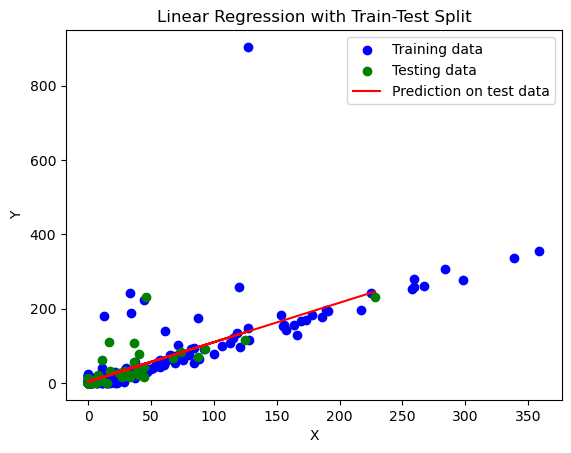

In [136]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import numpy as np

x_sam = np.array(x_sam).reshape(-1,1)
X_train, X_test, y_train, y_test = train_test_split(x_sam, y_sam, test_size=0.2, random_state=42)

# Create a linear regression model
model = LinearRegression()

# Fit the model with the training data
model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = model.predict(X_test)

# Plotting
plt.scatter(X_train, y_train, color='blue', label='Training data')
plt.scatter(X_test, y_test, color='green', label='Testing data')
plt.plot(X_test, y_pred, color='red', label='Prediction on test data')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Linear Regression with Train-Test Split')
plt.legend()
plt.show()


In [141]:
from sklearn.metrics import mean_squared_error
from math import sqrt


# Compute RMSE
rmse = sqrt(mean_squared_error(y_test, y_pred))
print(f"Root Mean Square Error (RMSE): {rmse}")

Root Mean Square Error (RMSE): 72.14880069097823


In [78]:
y_t = []
for i in range(len(X_test)):
    y_t.append(X_test[i,0])

In [79]:
from sklearn.metrics import mean_squared_error
from math import sqrt


# Compute RMSE
rmse = sqrt(mean_squared_error(y_t, y_test))
print(f"Root Mean Square Error (RMSE): {rmse}")

Root Mean Square Error (RMSE): 32.263096680377835


In [606]:
print(X_test[:10,-1], guess[:10], y_test[:10])


[ 0.  0.  0.  5.  0. 22.  0.  1.  7.  1.] [0.0, 0.0, 0.0, 5.0, 0.0, 22.0, 0.0, 1.0, 7.0, 1.0] [  4.   0.   0.   2.   1.  76.   4.   0. 295.   0.]


In [598]:
for i in range(len(y_pred)):
    print(X_test[i,:,-1], y_pred[i], y_test[i])

IndexError: too many indices for array: array is 2-dimensional, but 3 were indexed

In [624]:
from sklearn.metrics import mean_squared_error
from math import sqrt


# Compute RMSE
rmse = sqrt(mean_squared_error(y_test, y_pred))
print(f"Root Mean Square Error (RMSE): {rmse}")

Root Mean Square Error (RMSE): 45.51650170511881


In [451]:
# multiple routes simple model no weather


import numpy as np
import pandas as pd
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout, Conv1D
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

def create_sequences(data, window_size):
    X, y = [], []
    for i in range(len(data) - window_size):
        X.append(data[i:i+window_size])
        y.append(data[i+window_size])
    return np.array(X), np.array(y)

# Using past 5 hours to predict the next hour's delay
window_size = 8

# Convert datetime to its components
data['year'] = data['datetime'].dt.year
data['month'] = data['datetime'].dt.month
data['day'] = data['datetime'].dt.day
data['hour'] = data['datetime'].dt.hour
data['dayofweek'] = data['datetime'].dt.dayofweek  # Monday=0, Sunday=6

# One-hot encode the time variables
data = pd.get_dummies(data, columns=['month', 'day', 'hour', 'dayofweek'])


X, y = [], []


for route in routes:
    origin, dest, carrier = route[0], route[1], route[2]
    temp = data[(data['OP_CARRIER'] == carrier) & (data['ORIGIN'] == origin) & (data['DEST'] == dest)]
    features = temp[[col for col in temp.columns if 'month_' in col or 'day_' in col or 'hour_' in col or 'dayofweek_' in col] + ['DEP_DELAY'] + ['ARR_DELAY']]
    
    X1, y1 = create_sequences(features.values, window_size)
    # X, y = create_sequences(features.values, window_size)
    y1 = temp['DEP_DELAY'].values[window_size:]
    X1 = X1.reshape(X1.shape[0], X1.shape[1], features.shape[1])

    # Append the sequences for this route to the overall X and y
    if len(X1) > 0:
        if len(X) == 0:
            X = X1
            y = y1
        else:
            X = np.concatenate((X, X1), axis=0)
            y = np.concatenate((y, y1), axis=0)

# Reshape X for LSTM [samples, timesteps, features]
X = X.reshape(X.shape[0], X.shape[1], X.shape[2])

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Build LSTM model with Stacked layers
model = Sequential()
model.add(LSTM(50, input_shape=(X_train.shape[1], X_train.shape[2]), return_sequences=False)) # Add return_sequences=True for stacking
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')

# Train model
model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test), shuffle=False)

# Predict
y_pred = model.predict(X_test)


IndexError: tuple index out of range

In [ ]:
from sklearn.metrics import mean_squared_error
from math import sqrt


# Compute RMSE
rmse = sqrt(mean_squared_error(y_test, y_pred))
print(f"Root Mean Square Error (RMSE): {rmse}")

ValueError: y_true and y_pred have different number of output (71!=1)

In [254]:
import numpy as np
import pandas as pd
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout
from keras.callbacks import EarlyStopping, ReduceLROnPlateau
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

def create_sequences(data, window_size):
    X, y = [], []
    for i in range(len(data) - window_size):
        X.append(data[i:i+window_size])
        y.append(data[i+window_size])
    return np.array(X), np.array(y)

# Sample data loading (please ensure you have loaded your data into the 'data' variable)
# data = pd.read_csv('your_data_path.csv')

# Using past 8 hours to predict the next hour's delay
window_size = 8

# Convert datetime to its components
data['year'] = data['datetime'].dt.year
data['month'] = data['datetime'].dt.month
data['day'] = data['datetime'].dt.day
data['hour'] = data['datetime'].dt.hour
data['dayofweek'] = data['datetime'].dt.dayofweek  # Monday=0, Sunday=6

features = data[['month', 'day', 'hour', 'dayofweek', 'rain', 'snowfall', 'windspeed_100m']]
X, y = create_sequences(features.values, window_size)
y = data['DEP_DELAY'].values[window_size:]

# Feature Standardization
scaler_X = MinMaxScaler()
X = scaler_X.fit_transform(X.reshape(-1, X.shape[-1])).reshape(X.shape)
scaler_y = MinMaxScaler()
y = scaler_y.fit_transform(y.reshape(-1, 1))

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Build LSTM model with Stacked layers
model = Sequential()
model.add(LSTM(50, input_shape=(X_train.shape[1], X_train.shape[2]), return_sequences=True)) # Add return_sequences=True for stacking
model.add(Dropout(0.3))
model.add(LSTM(30, return_sequences=False))  # Additional LSTM layer
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')

# Callbacks
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=5, min_lr=0.001)

# Train model with Callbacks
model.fit(X_train, y_train, epochs=200, batch_size=32, validation_data=(X_test, y_test), shuffle=False, callbacks=[early_stopping, reduce_lr])

# Predict
y_pred = model.predict(X_test)
y_pred = scaler_y.inverse_transform(y_pred)  # Inverse scaling for predictions
y_test = scaler_y.inverse_transform(y_test)


Epoch 1/200
147/147 [==============================] - 3s 6ms/step - loss: 0.0041 - val_loss: 0.0023 - lr: 0.0010
Epoch 2/200
147/147 [==============================] - 0s 3ms/step - loss: 0.0038 - val_loss: 0.0023 - lr: 0.0010
Epoch 3/200
147/147 [==============================] - 0s 3ms/step - loss: 0.0037 - val_loss: 0.0023 - lr: 0.0010
Epoch 4/200
147/147 [==============================] - 0s 3ms/step - loss: 0.0037 - val_loss: 0.0023 - lr: 0.0010
Epoch 5/200
147/147 [==============================] - 0s 3ms/step - loss: 0.0037 - val_loss: 0.0023 - lr: 0.0010
Epoch 6/200
147/147 [==============================] - 0s 3ms/step - loss: 0.0037 - val_loss: 0.0023 - lr: 0.0010
Epoch 7/200
147/147 [==============================] - 0s 3ms/step - loss: 0.0037 - val_loss: 0.0023 - lr: 0.0010
Epoch 8/200
147/147 [==============================] - 0s 3ms/step - loss: 0.0037 - val_loss: 0.0023 - lr: 0.0010
Epoch 9/200
147/147 [==============================] - 1s 4ms/step - loss: 0.0037 - val_

KeyboardInterrupt: 

In [231]:
from sklearn.metrics import mean_squared_error
from math import sqrt


# Compute RMSE
y_test = scaler_y.inverse_transform(y_test)

rmse = sqrt(mean_squared_error(y_test, y_pred))
print(f"Root Mean Square Error (RMSE): {rmse}")

Root Mean Square Error (RMSE): 42.26330723504036


In [244]:
import numpy as np
import pandas as pd
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout
from keras.callbacks import EarlyStopping, ReduceLROnPlateau
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

def create_sequences(data, window_size):
    X, y = [], []
    for i in range(len(data) - window_size):
        X.append(data[i:i+window_size])
        y.append(data[i+window_size])
    return np.array(X), np.array(y)

# Sample data loading (please ensure you have loaded your data into the 'data' variable)
# data = pd.read_csv('your_data_path.csv')

# Using past 8 hours to predict the next hour's delay
window_size = 8

# Convert datetime to its components
data['year'] = data['datetime'].dt.year
data['month'] = data['datetime'].dt.month
data['day'] = data['datetime'].dt.day
data['hour'] = data['datetime'].dt.hour
data['dayofweek'] = data['datetime'].dt.dayofweek  # Monday=0, Sunday=6

features = data[['month', 'day', 'hour', 'dayofweek', 'rain', 'snowfall', 'windspeed_100m']]
X, y = create_sequences(features.values, window_size)
y = data['DEP_DELAY'].values[window_size:]

# Feature Standardization
scaler_X = MinMaxScaler()
X = scaler_X.fit_transform(X.reshape(-1, X.shape[-1])).reshape(X.shape)
scaler_y = MinMaxScaler()
y = scaler_y.fit_transform(y.reshape(-1, 1))

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

# Build LSTM model with Stacked layers
model = Sequential()
model.add(LSTM(32, input_shape=(X_train.shape[1], X_train.shape[2]), return_sequences=True)) # Add return_sequences=True for stacking
model.add(Dropout(0.3))
model.add(LSTM(64, return_sequences=False))  # Additional LSTM layer
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')

# Callbacks
early_stopping = EarlyStopping(monitor='val_loss', patience=100, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=5, min_lr=0.001)

# Train model with Callbacks
model.fit(X_train, y_train, epochs=200, batch_size=32, validation_data=(X_test, y_test), shuffle=False, callbacks=[early_stopping, reduce_lr])

# Predict
y_pred = model.predict(X_test)
y_pred = scaler_y.inverse_transform(y_pred)  # Inverse scaling for predictions
y_test = scaler_y.inverse_transform(y_test)


Epoch 1/200
165/165 [==============================] - 2s 5ms/step - loss: 0.0040 - val_loss: 0.0022 - lr: 0.0010
Epoch 2/200
165/165 [==============================] - 1s 4ms/step - loss: 0.0036 - val_loss: 0.0022 - lr: 0.0010
Epoch 3/200
165/165 [==============================] - 1s 3ms/step - loss: 0.0036 - val_loss: 0.0022 - lr: 0.0010
Epoch 4/200
165/165 [==============================] - 1s 3ms/step - loss: 0.0036 - val_loss: 0.0022 - lr: 0.0010
Epoch 5/200
165/165 [==============================] - 1s 3ms/step - loss: 0.0036 - val_loss: 0.0022 - lr: 0.0010
Epoch 6/200
165/165 [==============================] - 1s 3ms/step - loss: 0.0035 - val_loss: 0.0022 - lr: 0.0010
Epoch 7/200
165/165 [==============================] - 1s 3ms/step - loss: 0.0035 - val_loss: 0.0022 - lr: 0.0010
Epoch 8/200
165/165 [==============================] - 1s 3ms/step - loss: 0.0035 - val_loss: 0.0022 - lr: 0.0010
Epoch 9/200
165/165 [==============================] - 1s 3ms/step - loss: 0.0035 - val_

KeyboardInterrupt: 

In [221]:
from sklearn.metrics import mean_squared_error
from math import sqrt


# Compute RMSE
rmse = sqrt(mean_squared_error(y_test, y_pred))
print(f"Root Mean Square Error (RMSE): {rmse}")


Root Mean Square Error (RMSE): 27.612384856338696


In [222]:
import numpy as np
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Sample data
y_true = y_test

# Define a function to bin the values
def bin_values(values):
    bins = [0, 30, 60, float('inf')]
    labels = ['0-30', '30-60', '60+']
    return np.digitize(values, bins=bins, right=False).astype(str)

# Bin the true and predicted values
binned_y_true = bin_values(y_true)
binned_y_pred = bin_values(y_pred)

# Calculate classification metrics
print("Confusion Matrix:")
print(confusion_matrix(binned_y_true, binned_y_pred))
print("\nClassification Report:")
print(classification_report(binned_y_true, binned_y_pred))
print("\nAccuracy Score:")
print(accuracy_score(binned_y_true, binned_y_pred))


Confusion Matrix:
[[  0   0   0   0]
 [229 819  23   6]
 [ 10  30   4   1]
 [  3  27   5  14]]

Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1       0.93      0.76      0.84      1077
           2       0.12      0.09      0.10        45
           3       0.67      0.29      0.40        49

    accuracy                           0.71      1171
   macro avg       0.43      0.28      0.34      1171
weighted avg       0.89      0.71      0.79      1171


Accuracy Score:
0.7147736976942783


/Users/saianoopavunuri/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/saianoopavunuri/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/saianoopavunuri/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [242]:
response2 = requests.get('https://archive-api.open-meteo.com/v1/archive?latitude=33.75&longitude=-84.39&start_date=2017-01-01&end_date=2018-12-31&hourly=temperature_2m,rain,snowfall,cloudcover,windspeed_100m')

In [243]:
weather2 = response2.json()

In [244]:
weather_dict = {}
from datetime import datetime
for i, date in enumerate(weather2['hourly']['time']):
    hour  = datetime.strptime(date, "%Y-%m-%dT%H:%M")
    weather_dict[hour] = {'temperature_2m': weather2['hourly']['temperature_2m'][i],'rain': weather2['hourly']['rain'][i], 'snowfall': weather2['hourly']['snowfall'][i], 'cloudcover': weather2['hourly']['cloudcover'][i], 'windspeed_100m': weather2['hourly']['windspeed_100m'][i] }

In [246]:
# Floor the datetime to the nearest hour
data["floored_datetime"] = data["datetime"].dt.floor("H") + pd.Timedelta(hours=2)

# Look up the weather data and add new columns to the DataFrame
for feature in ['temperature_2m', 'rain', 'snowfall', 'cloudcover', 'windspeed_100m','precipitation']:
    data[feature+"_arr" + "_2hr"] = data["floored_datetime"].map(lambda x: weather_dict.get(x, {}).get(feature, None))

# Drop the 'floored_datetime' column if not needed
data.drop(columns=["floored_datetime"], inplace=True)


In [247]:
data.columns

Index(['index', 'FL_DATE', 'OP_CARRIER', 'OP_CARRIER_FL_NUM', 'ORIGIN', 'DEST',
       'CRS_DEP_TIME', 'DEP_TIME', 'DEP_DELAY', 'TAXI_OUT', 'WHEELS_OFF',
       'WHEELS_ON', 'TAXI_IN', 'CRS_ARR_TIME', 'ARR_TIME', 'ARR_DELAY',
       'CRS_ELAPSED_TIME', 'ACTUAL_ELAPSED_TIME', 'AIR_TIME', 'DISTANCE',
       'tiCRS_DEP_TIMEme', 'datetime', 'temperature_2m', 'rain', 'snowfall',
       'cloudcover', 'windspeed_100m', 'precipitation',
       'temperature_2m_arr_2hr', 'rain_arr_2hr', 'snowfall_arr_2hr',
       'cloudcover_arr_2hr', 'windspeed_100m_arr_2hr', 'precipitation_arr_2hr',
       'year', 'month', 'day', 'hour', 'dayofweek'],
      dtype='object')

In [248]:
import numpy as np
import pandas as pd
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split


def create_sequences(data, window_size):
    X, y = [], []
    for i in range(len(data) - window_size):
        X.append(data[i:i+window_size])
        y.append(data[i+window_size])
    return np.array(X), np.array(y)

# Using past 5 hours to predict the next hour's delay
window_size = 8

# Convert datetime to its components
data['year'] = data['datetime'].dt.year
data['month'] = data['datetime'].dt.month
data['day'] = data['datetime'].dt.day
data['hour'] = data['datetime'].dt.hour
data['dayofweek'] = data['datetime'].dt.dayofweek  # Monday=0, Sunday=6

features = data[['month', 'day', 'hour', 'dayofweek', 'rain', 'snowfall', 'windspeed_100m', 'rain_arr_2hr','snowfall_arr_2hr', 'windspeed_100m_arr_2hr']]
X, y = create_sequences(features.values, window_size)
y = data['DEP_DELAY'].values[window_size:]

# Reshape X for LSTM [samples, timesteps, features]
X = X.reshape(X.shape[0], X.shape[1], features.shape[1])

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Build LSTM model
model = Sequential()
model.add(LSTM(50, input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(Dropout(0.3))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')

# Train model
model.fit(X_train, y_train, epochs=200, batch_size=32, validation_data=(X_test, y_test), shuffle=False)

# Predict
y_pred = model.predict(X_test)


Epoch 1/200
146/146 [==============================] - 2s 4ms/step - loss: 1442.9301 - val_loss: 1279.8098
Epoch 2/200
146/146 [==============================] - 0s 2ms/step - loss: 1417.0137 - val_loss: 1270.4115
Epoch 3/200
146/146 [==============================] - 0s 3ms/step - loss: 1412.0981 - val_loss: 1263.8053
Epoch 4/200
146/146 [==============================] - 0s 2ms/step - loss: 1407.2360 - val_loss: 1258.7118
Epoch 5/200
146/146 [==============================] - 0s 3ms/step - loss: 1402.2797 - val_loss: 1248.0328
Epoch 6/200
146/146 [==============================] - 0s 2ms/step - loss: 1394.9066 - val_loss: 1249.3698
Epoch 7/200
146/146 [==============================] - 0s 2ms/step - loss: 1394.8107 - val_loss: 1240.4829
Epoch 8/200
146/146 [==============================] - 0s 2ms/step - loss: 1382.7849 - val_loss: 1234.9933
Epoch 9/200
146/146 [==============================] - 0s 2ms/step - loss: 1381.3826 - val_loss: 1229.1936
Epoch 10/200
146/146 [===============

In [250]:
from sklearn.metrics import mean_squared_error
from math import sqrt


# Compute RMSE
rmse = sqrt(mean_squared_error(y_test, y_pred))
print(f"Root Mean Square Error (RMSE): {rmse}")


Root Mean Square Error (RMSE): 33.847136609376165


In [249]:
data

,index,FL_DATE,OP_CARRIER,OP_CARRIER_FL_NUM,ORIGIN,DEST,CRS_DEP_TIME,DEP_TIME,DEP_DELAY,TAXI_OUT,...,rain_arr_2hr,snowfall_arr_2hr,cloudcover_arr_2hr,windspeed_100m_arr_2hr,precipitation_arr_2hr,year,month,day,hour,dayofweek
6,8463,2017-01-01,DL,1827,MCO,ATL,06:30,631.0,1.0,8.0,...,1.2,0.0,100,29.5,None,2017,1,1,6,6
3,7839,2017-01-01,DL,1109,MCO,ATL,08:00,800.0,0.0,14.0,...,0.4,0.0,100,12.6,None,2017,1,1,8,6
13,8646,2017-01-01,DL,2032,MCO,ATL,08:30,827.0,0.0,11.0,...,0.4,0.0,100,12.6,None,2017,1,1,8,6
4,8460,2017-01-01,DL,1824,MCO,ATL,09:20,919.0,0.0,19.0,...,0.2,0.0,100,13.6,None,2017,1,1,9,6
5,8462,2017-01-01,DL,1826,MCO,ATL,10:25,1023.0,0.0,12.0,...,0.0,0.0,100,15.6,None,2017,1,1,10,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5910,5662786,2017-12-31,DL,82,MCO,ATL,12:20,1212.0,0.0,12.0,...,0.0,0.0,100,12.6,None,2017,12,31,12,6
5911,5663163,2017-12-31,DL,1058,MCO,ATL,14:20,1419.0,0.0,18.0,...,0.0,0.0,100,8.9,None,2017,12,31,14,6
5909,5662782,2017-12-31,DL,72,MCO,ATL,15:20,1517.0,0.0,26.0,...,0.0,0.0,100,10.0,None,2017,12,31,15,6
5917,5664379,2017-12-31,DL,2586,MCO,ATL,16:25,1623.0,0.0,14.0,...,0.1,0.0,100,16.9,None,2017,12,31,16,6
